# 1. Sourcing and loading
## 1a. Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
#from io import StringIO  
#from IPython.display import Image
#pip install pydotplus
#import pydotplus

## 1b. Load data 

In [2]:
# Read in the data to a variable called coffeeData
import os
os.chdir('C:/Sereda/Lectures/Springboard/Capstone2_CustomerChurn/')
#df = pd.read_csv('data/df.csv')
#df = pd.read_csv('data/df_20161022_1.csv')
#df = pd.read_csv('data/df_20161022_1.all_onehot.csv')
#df = pd.read_csv('data/df_20161022_1.gender_onehot.featuresmt.csv')
csv = "data/df_20161022_onehot.csv" #csv = "data/df_20161022_1.gender_onehot.featuresmt.csv"
df = pd.read_csv(csv)
drop_cols = False
if drop_cols:
    df = df.drop(['registration_Month','registration_winter','registration_spring','registration_summer',
              'registration_autumn','registration_DayofMonth','registration_beginOfMonth','registration_middleOfMonth',
             'registration_endOfMonth','registration_DayOfWeek','registration_holiday','registration_weekday',
             'firsttransaction_Month','firsttransaction_winter','firsttransaction_spring','firsttransaction_summer',
             'firsttransaction_autumn','firsttransaction_DayofMonth','firsttransaction_beginOfMonth',
             'firsttransaction_middleOfMonth','firsttransaction_endOfMonth','firsttransaction_DayOfWeek','firsttransaction_holiday',
             'firsttransaction_weekday','reg_to_trans_days1','transaction_Month1','transaction_winter1','transaction_spring1',
             'transaction_summer1','transaction_autumn1','transaction_DayofMonth1','transaction_beginOfMonth1','transaction_middleOfMonth1',
             'transaction_endOfMonth1','transaction_DayOfWeek1','transaction_holiday1','transaction_weekday1']
             ,axis=1)
print("No. of descriptors:",df.shape[1]-1)
print("No. of records:",df.shape[0])
display(df.head())
pd.set_option('display.max_seq_items', None)
print(df.columns)

No. of descriptors: 371
No. of records: 17124


,is_auto_renew,is_cancel,reg_to_trans_days,is_churn,registration_winter,registration_spring,registration_summer,registration_autumn,registration_beginOfMonth,registration_middleOfMonth,...,transaction_DayofMonth_29,transaction_DayofMonth_30,transaction_DayofMonth_31,transaction_DayOfWeek_0,transaction_DayOfWeek_1,transaction_DayOfWeek_2,transaction_DayOfWeek_3,transaction_DayOfWeek_4,transaction_DayOfWeek_5,transaction_DayOfWeek_6
0,0,0,4098,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,4098,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,4098,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,4021,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,4021,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


Index(['is_auto_renew', 'is_cancel', 'reg_to_trans_days', 'is_churn',
       'registration_winter', 'registration_spring', 'registration_summer',
       'registration_autumn', 'registration_beginOfMonth',
       'registration_middleOfMonth', 'registration_endOfMonth',
       'registration_holiday', 'registration_weekday',
       'firsttransaction_winter', 'firsttransaction_spring',
       'firsttransaction_summer', 'firsttransaction_autumn',
       'firsttransaction_beginOfMonth', 'firsttransaction_middleOfMonth',
       'firsttransaction_endOfMonth', 'firsttransaction_holiday',
       'firsttransaction_weekday', 'transaction_winter', 'transaction_spring',
       'transaction_summer', 'transaction_autumn', 'transaction_beginOfMonth',
       'transaction_middleOfMonth', 'transaction_endOfMonth',
       'transaction_holiday', 'transaction_weekday', 'num_25_av7',
       'num_50_av7', 'num_75_av7', 'num_985_av7', 'num_100_av7', 'num_unq_av7',
       'total_secs_av7', 'num_25_av30', 'num_50

#### Explanatory and response variables

In [3]:
X = df.drop('is_churn', axis=1) # drop unknown churn
y = df[['is_churn']]
y = np.ravel(y)
#print(y[:5])

#### Train-Test Split

In [4]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

## Model 1: Entropy model - no max_depth

Let's remind ourselves of what's going on with a decision tree implementing an entropy model in scikitlearn.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category.

In [5]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion = "entropy")

# Call fit() on entr_model
entr_model.fit(X_train, y_train) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
print(X_test, y_pred)

       is_auto_renew  is_cancel  reg_to_trans_days  registration_winter  \
10326              0          0                665                    0   
9574               1          0                522                    0   
305                1          0               3615                    1   
7659               1          0                596                    0   
4461               1          0               1250                    0   
...              ...        ...                ...                  ...   
11216              1          1                  0                    1   
2447               1          0               1799                    1   
7807               1          0                548                    0   
12095              1          0                  0                    0   
7635               1          0                761                    0   

       registration_spring  registration_summer  registration_autumn  \
10326                    0 

### Interpretation and evaluation

In [13]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.9427703807521607
Balanced accuracy: 0.8035837834700086
Precision for "Yes" 0.6149253731343284
Precision for "No" 0.9706031424227065
Recall for "Yes" 0.639751552795031
Recall for "No" 0.9674160141449861


### Tree

'Customer_Churn.Decision_Tree.pdf'

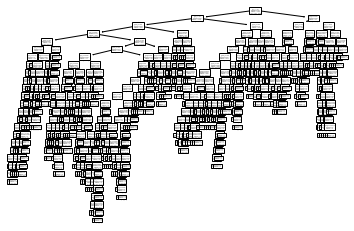

In [34]:
# Now we want to visualize the tree
tree.plot_tree(entr_model)

# We can do so with export_graphviz
import graphviz
# for class_names use entr_model.classes_
dot_data = tree.export_graphviz(entr_model, out_file=None, class_names=[str(entr_model.classes_[0]),str(entr_model.classes_[1])], filled=True)
graph = graphviz.Source(dot_data)
graph.render("Customer_Churn.Decision_Tree_entropy")

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [35]:
gini_model = tree.DecisionTreeClassifier(criterion='gini') 
gini_model.fit(X_train, y_train) # train model
y_pred = gini_model.predict(X_test) # predict
y_pred = pd.Series(y_pred) # Turn y_pred into a series, as before
print(X_test, y_pred) # Check out gini_model

       is_auto_renew  is_cancel  reg_to_trans_days  registration_winter  \
10326              0          0                665                    0   
9574               1          0                522                    0   
305                1          0               3615                    1   
7659               1          0                596                    0   
4461               1          0               1250                    0   
...              ...        ...                ...                  ...   
11216              1          1                  0                    1   
2447               1          0               1799                    1   
7807               1          0                548                    0   
12095              1          0                  0                    0   
7635               1          0                761                    0   

       registration_spring  registration_summer  registration_autumn  \
10326                    0 

'Customer_Churn.Decision_Tree_gini.pdf'

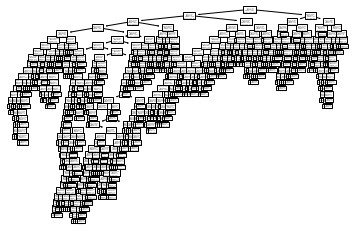

In [38]:
tree.plot_tree(gini_model)
# We can do so with export_graphviz
import graphviz
# for class_names use gini_model.classes_
dot_data = tree.export_graphviz(gini_model, out_file=None, class_names=[str(gini_model.classes_[0]),str(gini_model.classes_[1])], filled=True)
graph = graphviz.Source(dot_data)
graph.render("Customer_Churn.Decision_Tree_gini")

In [39]:
# Gini index calculation for a node
#The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one
def gini(n1,n2):
    n = n1+n2 # total no.
    p1=n1/n; p2=n2/n; # probabilities
    return 1-p1**2-p2**2

n1 = 108
n2 = 44
print("Gini =",gini(n1,n2))

Gini = 0.41135734072022156


In [41]:
# Model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Gini impurity model
Accuracy: 0.9411352487736511
Balanced accuracy: 0.8041262223505214
Precision score 0.6017441860465116
Recall score 0.9653953018439


In [43]:
print(f"Entropy model has {round((0.9427703807521607/0.9411352487736511-1)*100,2)}% higher accuracy.")

Entropy model has 0.17% higher accuracy.
